
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset used**: No-show appointments
(original source on Kaggle)

> **Research Question**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
(Factors in question are: age, waiting days, disease presence, enrollment in walfare program, living place and handicap status)

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
data= pd.read_csv('noshow.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print('dataset has {} entries'.format(data.shape[0]))
print('dataset has {} columns'.format(data.shape[1]))


dataset has 110527 entries
dataset has 14 columns


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning (included the following)
##### - Renaming columns
##### - Quick look over the data
##### - Dropping duplicated entries
##### - Checking null entries
##### - Droppin inappropriate / wrong entires

In [5]:
# Some column names are miswritten ( to be corrected accordingly)
data = data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMS', 'No-show': 'NoShow'})

In [6]:
# data exploration to have and over look
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### we can see that the age column has an unacceptable value of -1

In [7]:
# further Exploring sample of the data of each column
for col in data.columns:
    print('\n values in',col,': {}'.format(data[col].unique()))


 values in PatientId : [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]

 values in AppointmentID : [5642903 5642503 5642549 ... 5630692 5630323 5629448]

 values in Gender : ['F' 'M']

 values in ScheduledDay : ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']

 values in AppointmentDay : ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '201

In [8]:
# from reviewing the data we should have the following:
# Intiger columns {PatientId, AppointmentID, Age}
data['PatientId'] = data['PatientId'].astype('int64')

# Datetime columns {ShceduleDay, Appointmentday}, changing format to year-month-day
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Decoded columns {Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS}
# These columns are decoded into numbers
# can be changed to object type
ob_columns=['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS']
for col in ob_columns:
    data[col] = data[col].astype('object')


# Rest of colums should be strings
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  object        
 8   Hypertension    110527 non-null  object        
 9   Diabetes        110527 non-null  object        
 10  Alcoholism      110527 non-null  object        
 11  Handicap        110527 non-null  object        
 12  SMS             110527 non-null  object        
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(3), obje

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
print('null data :\n',data.isnull().sum())


null data :
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS               0
NoShow            0
dtype: int64


In [10]:
print('duplicated data :',data.duplicated().sum())

duplicated data : 0


In [11]:
# non relevant columns to our analysis to be removed
data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [12]:
# drop entries with wrong entires
data=data[data['Age'] != -1]

In [13]:
data['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [14]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
##### Factors in question are: age, waiting days, disease presence, enrollment in walfare program, living place and handicap status

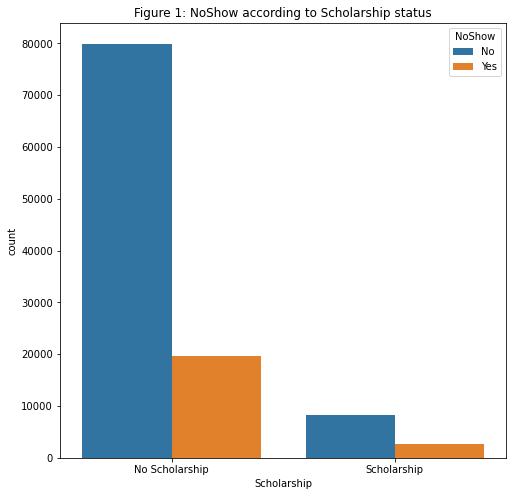

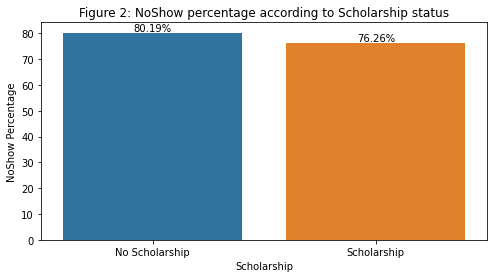

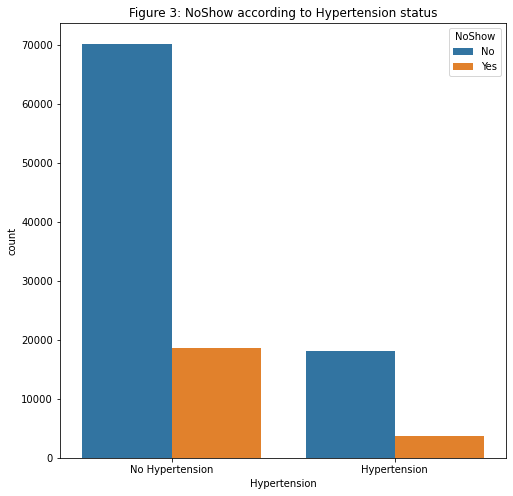

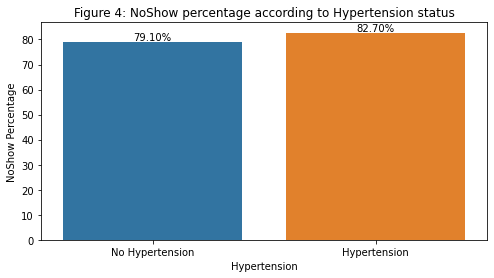

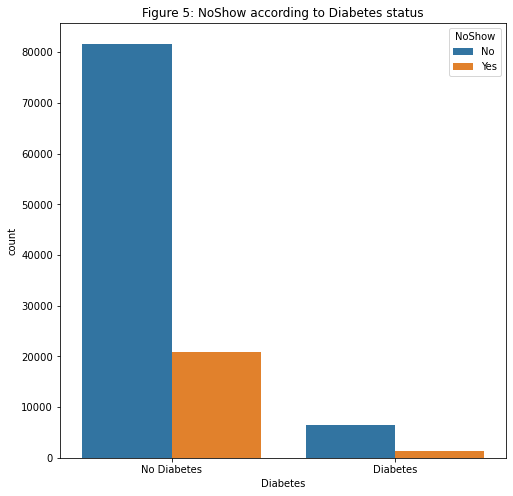

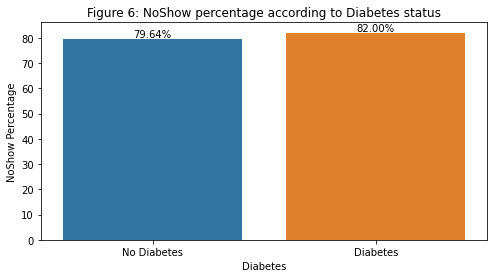

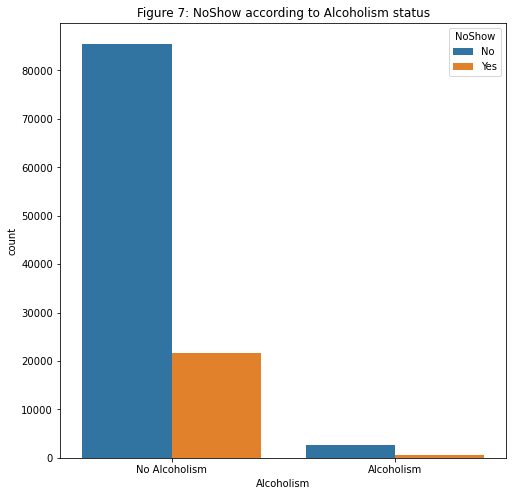

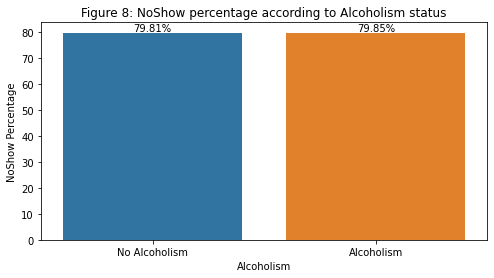

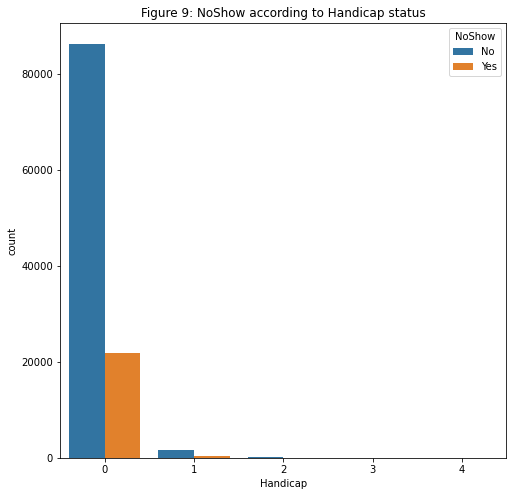

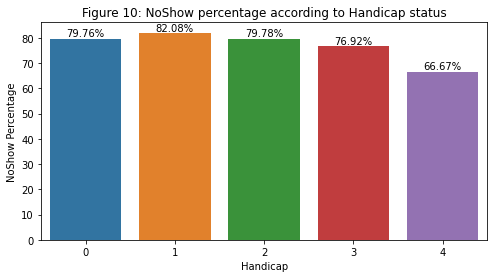

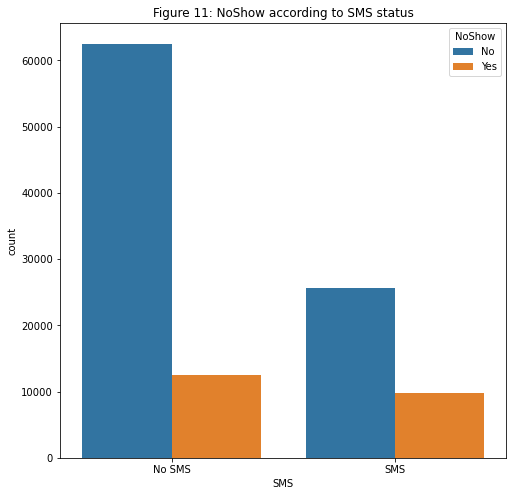

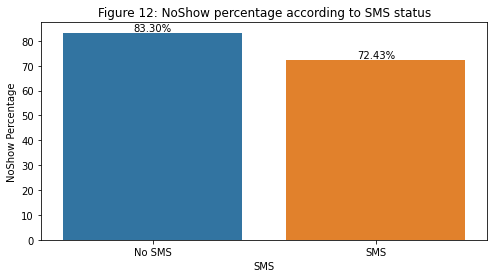

In [15]:
n=0
for col in ob_columns:
    n=n+1
    plt.figure(figsize=(8,8))
    ax = sns.countplot(x=data[col], hue=data.NoShow )
    ax.set_title(('Figure %i: NoShow according to {} status'.format(col)) %n)
    if col != 'Handicap':
        x_labels=['No {}'.format(col), col]
        ax.set_xticklabels(x_labels)
    plt.show()
    
    n=n+1
    showratio = data[data.NoShow == 'No'].groupby([col]).size()/data.groupby([col]).size()*100
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=showratio.index, y=showratio)
    ax.set_title(('Figure %i: NoShow percentage according to {} status'.format(col)) %n)
    if col != 'Handicap':
        x_labels=['No {}'.format(col), col]
        ax.set_xticklabels(x_labels)
    for i in ax.containers:
        ax.bar_label(i,fmt='%.2f%%')
    ax.set(ylabel='NoShow Percentage')
    plt.show()

##### Figure 1,2 demonstrate that those who had no scholarship showed more to their appointments
##### Figure 3 shows that patient without hypertention had more visits, but in Figure 4, according to percentage, those with hypertension had more visits which is a more reliable way to compare due to the unbalanced data
##### Figure 5 shows that diabetes free patients had more show to visits, but in Figure 6, according to percentage, those with diabetes had more visits which is a more reliable way to compare due to the unbalanced data
##### Figure 7 shows that non-alcholic had more show, but in Figure 8, there is no actual difference between the 2 groups when compared by percentages
##### Figure 9 shows that those with the least handicap had more show, but when compared by percentages in Figure 10, group 1 of handicapped patients had the most show rate to the clinic
##### Figure 11,12 showed that those who didnt recive an SMS had more show to their appointments

In [16]:
def boxplot(var):
    global n
    n += 1
    plt.figure(figsize=(6,6))
    ax = sns.boxplot(data=data, x="NoShow", y=var)
    ax.set_title("Figure %i:NoShow According To {}".format(var) %n)
    plt.show()
    return n
def distplot(var):
    global n
    n += 1
    ax = sns.displot(data, x=var, hue="NoShow", kind="kde", fill=True)
    ax.fig.suptitle("Figure %i:NoShow distribution According to {}".format(var) %n)
    plt.show()

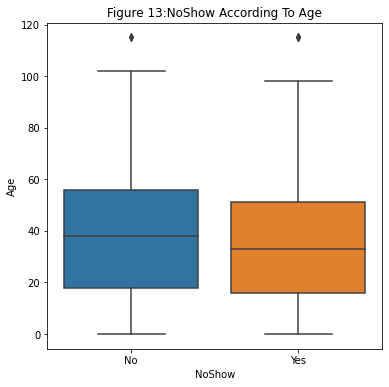

13

In [17]:
boxplot('Age')

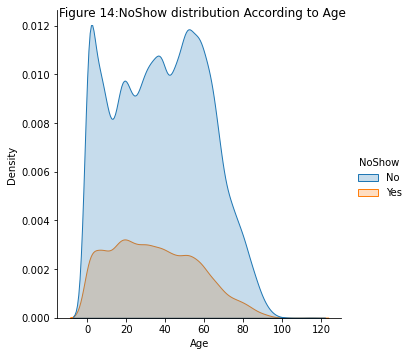

In [18]:
distplot('Age')

##### figure 13 shows that those who had more show to their appointment were older compared to those who didn't show though when compared in Figure 14 by density, there is no distribution difference of age between those who presented to the clinic and those who didn't

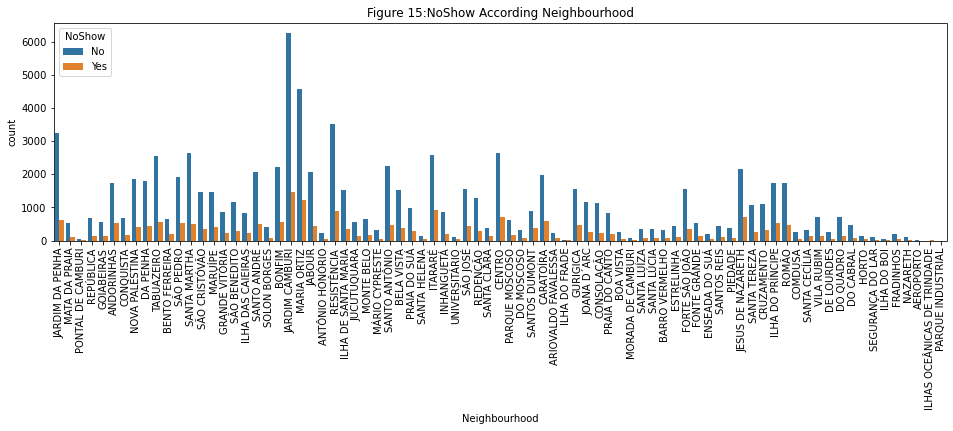

In [19]:
n=n+1
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=data['Neighbourhood'], hue=data['NoShow'])
ax.set_title("Figure %i:NoShow According Neighbourhood" %n)
plt.show()

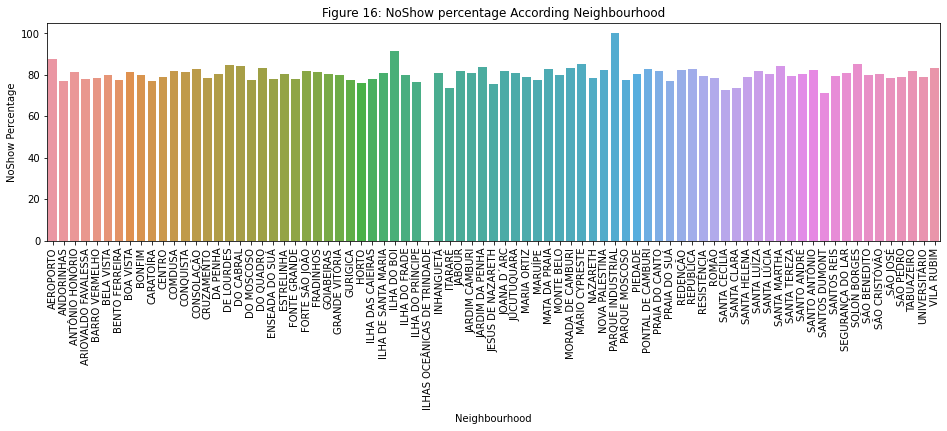

In [20]:
n=n+1
showratio = data[data.NoShow == 'No'].groupby(['Neighbourhood']).size()/data.groupby(['Neighbourhood']).size()*100
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=showratio.index, y=showratio)
ax.set_title("Figure %i: NoShow percentage According Neighbourhood" %n)
ax.set(ylabel='NoShow Percentage')
plt.show()

##### Figure 16 shows that those who live in PARA QUE INDUSTRIAL had more commitment to come to clinics

In [21]:
data['Waiting_days'] = data['AppointmentDay'] - data['ScheduledDay']
data['Waiting_days'] = data['Waiting_days'].dt.days



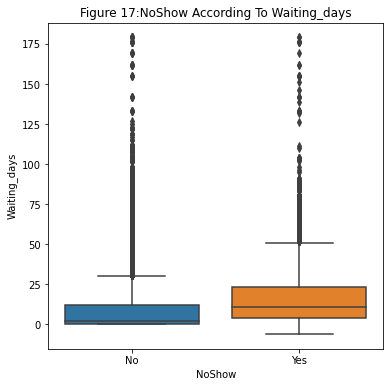

17

In [22]:
boxplot('Waiting_days')

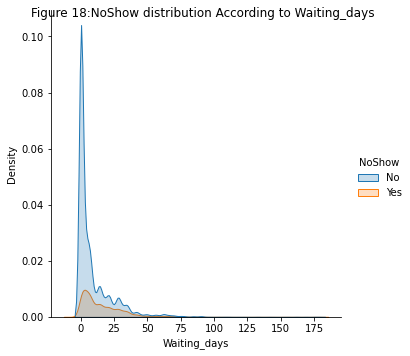

In [23]:
distplot('Waiting_days')

##### Figure 17 shows that fewer waiting days between booking an appointment and the actual booking date contributed in more show to the clinic while in figure 18, the distribution of waiting days didn't differ much between the two groups

<a id='conclusions'></a>
## Conclusions
#### Factors showed to have an influence on the show rate to the clinic were:
##### - Having no scholarship ( not enrolled in Brasilian welfare program )
##### - Having hypertension or diabetes
##### - Having a mild degree of handicap
##### - Not receiving an SMS
##### - those who live in PARA QUE INDUSTRIAL
##### - Less waiting days


### These are limitations in the data provided
##### Logically, SMS should have increased the show rate, unlike what is presented in the graphs here. It is not mentioned weather these SMS were sent at the time of booking or just before the appointment and by how many days. Further investigating this may explain the findings presented
##### Those who live in the Paaraque industrial showed more show rate, but this adds no importance unless explored more. for example, if this neighborhood had special characteristics like the number of clinics, methods of transportation, or education level of people living there
##### Outliers are noticed in age and in the variable computed (waiting days) which may affect the data analysis
##### There are wrong entries in the age column that needed to be dropped
##### the data set is not balanced